# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:** The smartcab did not move on any of the trials. Since the cab is always idling (taking the action 'None'), we see only three different situations: 
- A red light gives a positive reward, because in general the cab is supposed to stop at a red light, unless it has to go right and there is no oncoming traffic from its left.
- A green light with no oncoming traffic gives a negative reward, because the cab could take any direction without causing an accident.
- A green light with oncoming traffic gives a positive reward. In this situation the cab could go right and forward without causing an accident. Only when taking a left turn the oncoming traffic has to be taken into account. 

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

Parameters in agent.py:
- epsilon: One of the problems of reinforcement learning is the exploration-exploitation dilemma. On the one hand, the agent has to explore the available space of states and actions, while learning from rewards. But at some point the agent has to switch over to exploiting the learned policy to refine it. The parameter epsilon helps to  break out of this dilemma. When choosing an action, we generate a random number. If the random number is below epsilon, the agent will choose one of the available actions at random with equal probability. Otherwise, the best action that the agent has discovered so far will be choosen. epsilon decays on each trial until it reaches a limit, after which testing will begin. The specific decay function for epsilon has to be implemented and its starting value can be set via the function parameter.

- alpha: When receiving a reward, the learning rate alpha determines how much of the reward will be added to the new Q value, and how much the agent remembers from previous experiences (the old Q value). When alpha is 1, the agent will never use the Q value from its previous experiences, but it will only take the full reward as the nw Q value. When alpha is 0, the agent will never change the Q values and not learn the optimal policy. With the function parameter alpha we can set a constant learning rate alpha, or in the case that a dynamic function for alpha was implemented, its starting value.

- n_test: After the learning phase, a testing phase is run to gather information about the performance of the agent. The parameter n_test sets the number of test trials. The minimum number of test trials is 20. 

Agents call the *`act`* function of *`Environment`* when they perform an action. The function checks if any traffic laws are violated by the agent and returns feedback in the form of a reward value.

The function *`render`* creates the graphical output of the simulation and is only called when the GUI is available and was not explicitly switched off with the flag *`display`*. *`render_text`* shows the simulation results as console output and is always available.

*`next_waypoint`* first checks, if the target is reached. If not, it checks if *`dx`* is not zero, which means that the target is either to the east or the west of the cab. If this is the case, the cab will be advised to pursue its target by going east or west, meaning that the east-west axis is preferred.  

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


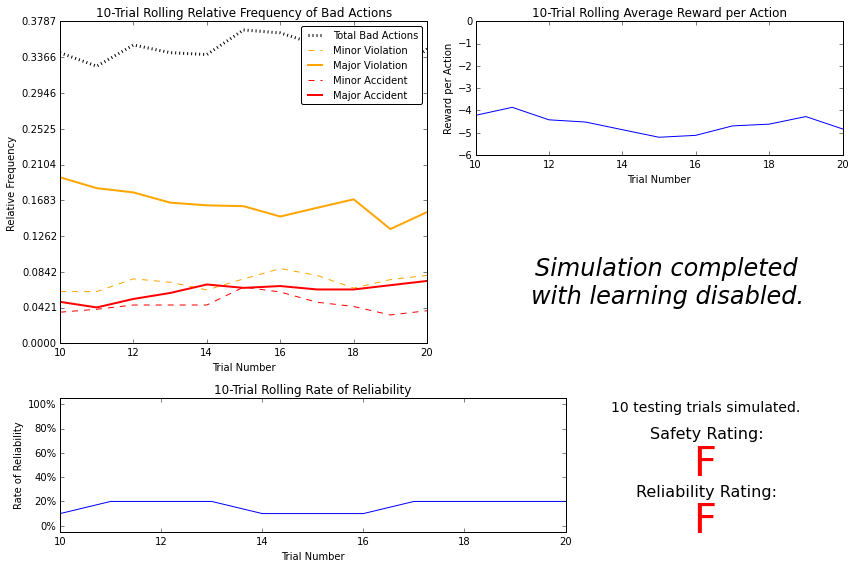

In [23]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

**General observation:** Averages for the plots are taken over 10 consecutive trials, with the horizontal axis showing the index of the last trial of these rolling averages.

**Relative frequency of bad actions:** The total frequency of bad actions is between 30% and 37%, which means that the agent makes at least one bad decision on every third trial. The majority of these bad actions are major violations, which means driving forward or left through a red light. Because the chance for these actions (forward or left) is 50% and the chance to encounter a red light is 50%, the expected value for major violations is 25%.

**Rate of reliability:** The cab is performing a random walk on a two-dimensional, spherical lattice. Because its chance of moving is 75% and the number of locations is finite, it can be expected that the chance of visiting the target location is greater than zero. In the trial shown above the rate of reliability lies between 10% and 20%.

**Average reward per action:** Because the number of violations and accidents is high and the rate of reliablity is low, the cab receives mostly negative rewards. But since it does not learn from the reward feedback, the cab's decisions never get any better.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:** *`Waypoint`* is relevant beacuse it tells the smartcab how to reach the destination in the shortest time, maximizing efficiency.

From *`inputs`*, *`light`* is the most relevant, because it helps the cab to avoid major violations. *`oncoming`* is importing when taking a left turn, and *`left`* is important when taking a right turn.  

Traffic from the right is not relevant, because it can never lead to a collision (assuming that the other drivers do not run over red lights).

Deadline is not relevant for the smartcab, because it always tries to take the shortest route. If it could look ahead and take into consideration the timing of traffic lights and traffic density, then deadline should be considered for planning the optimal route. 

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:** 

  |  Selected feature   |  Number of values  |
  | :-: | :-: |
  |  waypoint  |  3  |
  |  light     |  2  |
  |  left      |  4  |
  |  oncoming  |  4  |
  
The state space has 96 states. Whit the naive assumption that each state is visitied with equal probability, we would need to run at least 100 trials to visit each state at least once on average. But this naive asumption is not true and some states have a very low probability, which means that the agent will never visit them during training. Because the same is of course true for the random test setup, we will also very likely not encounter the rare states during testing, which means they will not lead to bad results. A better test setup would be to present situations where all possible states are encountered. 

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

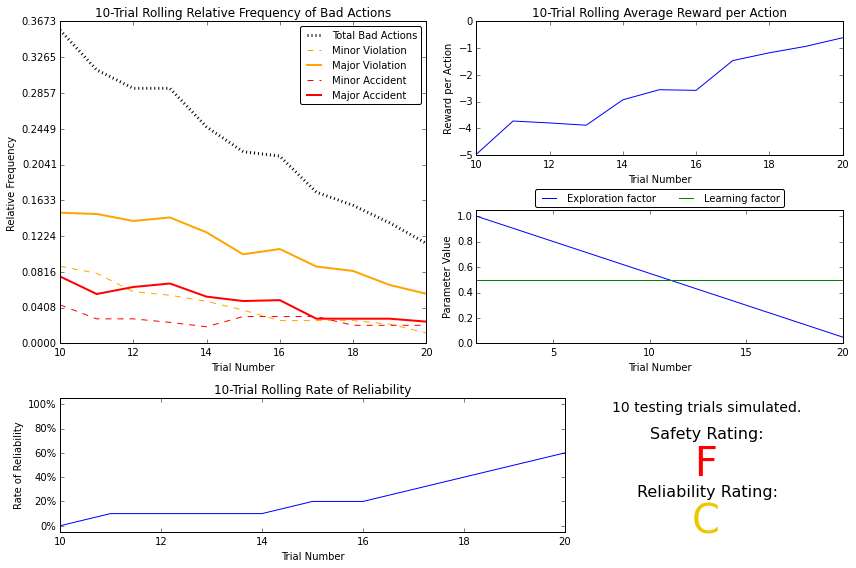

In [24]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

**Relative frequency of bad actions:** The total frequency of bad actions steadily declines from 32% to under 16%. This means that the agent learns to drive safely almost immediately. 

**Rate of reliability:** The reliability stays at 0 to 10% until trial number 15, where it starts to rise until it reaches 60%. It seems that the agent has to learn to drive safely before it can learn to reach its destination. 

**Average reward per action:** Because the number of vioalations and accidents declines and the agent also reaches its destination more often in the later trials, the average rewards increase. The rewards do not cross over into positive values, but with more trials this is likely to happen.

**Exploration factor:** The exploration factor *`epsilon`* shows the linear decline as intended. At 20 trials it falls below the tolerance of 0.05 and the testing trials begin.

**Rating:** The safety rating is still at F, because the agent still cause one major accident on the test trials. The reliability went up to C, because the agent reached the destination in 70% of the test trials.  

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

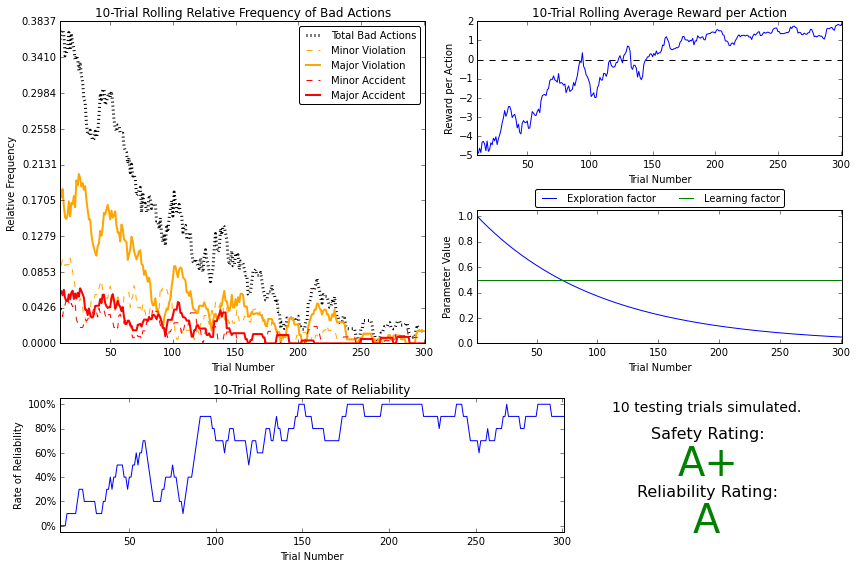

In [26]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:** 

**Exploration factor:**  An exponential decay $\epsilon = e^{-at}$ was used with $a=0.01$. The exploration phase takes much longer than in then previous setup, with the switch from exploration to exploitation occurring around the 75th trial, when $epsilon$ reaches a value of $0.5$. Because the tolerance for $\epsilon$ was not changed, the agent goes through more than 300 trials before testing. This choice of epsilon was intended to make the exploitation phase more than twice as long as the exploration phase, giving the agent a chance to refine the Q-values that it learned during exploration. 

**Learning factor:** The learning rate $\alpha$ was kept unchanged at $0.5$.

**Relative frequency of bad actions:** The total frequency of bad actions declines from 32% until it reaches almost zero. We can see several upward spikes, indicating situations where the cab explored a new policy or had to correct a wrong policy.  

**Rate of reliability:** Reliability rises and reaches 100% at around 200 trials. We can see that it stays at 100% for 25 trials, which correlates with a rise in the number of bad actions. This indicates that a this point the cab already knows how to follow the directions, but it has not yet learned all traffic rules. At 250 trials this situation inverts, with bad actions declining at the cost of reliablity.   

**Average reward per action:** The average rewards show an upward trend and cross over into positive values between 100 and 150 trials. The rewards then seem to plateau close to a value below 2.

**Rating:** The safety rating went up to an A+, meaning that the cab did not cause major accident nor committed traffic violations on the test trials. The reliability went up to A, meaning that the cab almost always reaches its destination on time. This is unexpected, because the cab has perfect information on how to reach its goal on time. But the reward structure seems to be setup such that safety is favored over reliabilty. 

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 

  |  waypoint  |  light  |  oncoming  |  left  |  optimal policy | correctly learned? |
  | :-: | :-: | :-: | :-: | :-: | :-: |
  | left | green | forward | left | None | no (forward instead) |
  | left | green | left | None | left | yes |
  | left | green | None | None | left | yes |
  | right | red | forward | None | right | yes |
  | right | red | forward | forward | None | yes |
  | forward | green | left | forward | forward | yes |
  | forward | green | left | forward | None | not encountered |
  
**Example 1:** Q-values learned for the state **('right', 'red', 'right', None)**:
- forward : -9.20
- right : 2.09
- None : 1.33
- left : -37.37

In this state the cab would take the action right, which is correct, because the next waypoint is to its right, and it can drive over the red light because there is no traffic from its left. Note that the Q-value for the action None is also positive, because stopping at a red light is in general the correct action, except for this specific state.

**Example 2:** Q-values learned for the state **('left', 'green', 'forward', 'left')**:
- forward : 0.63
- right : 0.00
- None : -4.28
- left : -10.24

The cab has to go left on a green light, but it has to yield to the oncoming traffic. The correct response would be *`None*`. Instead the cab would choose to go forward, which is an action that does not violate any rules or causes accidents. The action *`left`* has the lowest Q-value, because it's against a traffic rule. The action right has the value zero, which probably means that it was never explored. The correct action *`None has`* the second lowest Q-value. I think this is due to a bug in *`environment.py`*, line 330. There the cab is penalized for idling at a green light, which is correct if it has to go forward or right. If it has to do a left turn, it should only be penalized if there is no oncoming traffic:   

        # Agent wants to perform no action:
        elif action == None:
            if light == 'green' and (waypoint != 'left' or inputs['oncoming'] == 'left'): # No oncoming traffic
                violation = 1 # Minor violation
                
Note that we have to check *`waypoint`*, which means that in this situation the intention of the agent is relevant to judge if it has to be penalized. In other words, a driver has to be penalized for idling at a green light, unless he **intended** to take a left turn and there was oncoming traffic.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:** Because the direction of the next best waypoint is already provided to the cab, it only has to learn two thing: 1) how to follow the best direction and 2) how to avoid accidents and traffic violations. This means that the cab's decisions are based purely on local information, and any future states do not matter to it. This changes if we take away the best direction indicator and instead make global information part of the state, i.e. current and target coordinates. Then the cab needs to learn the best policy to get from point A to B, and future rewards for reaching the goal have to be taken into account.

The environment is set up randomly, with start and goal changing on every trial. This means that the agent will reach any possible state with a non-zero probability, regardless of the action taken by the agent. As a consequence, the agent is not able to learn any causal relationship between its current state and the actions that lead to the next state. This property of the environment forbids to use discounted future rewards.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.